In [0]:
import os
import pandas as pd

df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/auto-mpg.csv")
print(df[0:5])

    mpg  cylinders  displacement  ... year  origin                       name
0  18.0          8         307.0  ...   70       1  chevrolet chevelle malibu
1  15.0          8         350.0  ...   70       1          buick skylark 320
2  18.0          8         318.0  ...   70       1         plymouth satellite
3  16.0          8         304.0  ...   70       1              amc rebel sst
4  17.0          8         302.0  ...   70       1                ford torino

[5 rows x 9 columns]


In [0]:
display(df[0:5])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [0]:
df = df.select_dtypes(include=['int','float'])
headers = list(df.columns.values)
fields = []
for field in headers:
  fields.append({
      'name':field,
      'mean':df[field].mean(),
      'var':df[field].var(),
      'sdev':df[field].std()
  })
for field in fields:
  print(field)

{'name': 'mpg', 'mean': 23.514572864321615, 'var': 61.089610774274405, 'sdev': 7.815984312565782}
{'name': 'cylinders', 'mean': 5.454773869346734, 'var': 2.8934154399199943, 'sdev': 1.7010042445332094}
{'name': 'displacement', 'mean': 193.42587939698493, 'var': 10872.199152247364, 'sdev': 104.26983817119581}
{'name': 'weight', 'mean': 2970.424623115578, 'var': 717140.9905256768, 'sdev': 846.8417741973271}
{'name': 'acceleration', 'mean': 15.568090452261291, 'var': 7.604848233611381, 'sdev': 2.7576889298126757}
{'name': 'year', 'mean': 76.01005025125629, 'var': 13.672442818627143, 'sdev': 3.697626646732623}
{'name': 'origin', 'mean': 1.5728643216080402, 'var': 0.6432920268850575, 'sdev': 0.8020548777266163}


In [0]:
df2 = pd.DataFrame(fields)
display(df2)

,name,mean,var,sdev
0,mpg,23.514573,61.089611,7.815984
1,cylinders,5.454774,2.893415,1.701004
2,displacement,193.425879,10872.199152,104.269838
3,weight,2970.424623,717140.990526,846.841774
4,acceleration,15.568090,7.604848,2.757689
5,year,76.010050,13.672443,3.697627
6,origin,1.572864,0.643292,0.802055


In [0]:
import os
import pandas as pd

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])
print(f"horsepower has na? {pd.isnull(df['horsepower']).values.any()}")
    
print("Filling missing values...")
med = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(med)
# df = df.dropna() # you can also simply drop NA values
                 
print(f"horsepower has na? {pd.isnull(df['horsepower']).values.any()}")

horsepower has na? True
Filling missing values...
horsepower has na? False


In [0]:

import os
import pandas as pd

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv",
    na_values=['NA','?'])

print(f"Before drop: {list(df.columns)}")
df.drop('name', 1, inplace=True)
print(f"After drop: {list(df.columns)}")

Before drop: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
After drop: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']


In [0]:
import os
import pandas as pd

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv",
    na_values=['NA','?'])

col_horsepower = df['horsepower']
col_name = df['name']
result = pd.concat([col_name, col_horsepower], axis=1)
display(result[0:5])

,name,horsepower
0,chevrolet chevelle malibu,130.0
1,buick skylark 320,165.0
2,plymouth satellite,150.0
3,amc rebel sst,150.0
4,ford torino,140.0


In [0]:
try:
    from google.colab import drive
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

TensorFlow 2.x selected.
Note: using Google CoLab


In [0]:
import tensorflow as tf
print("Tensor Flow Version: {}".format(tf.__version__))

Tensor Flow Version: 2.1.0


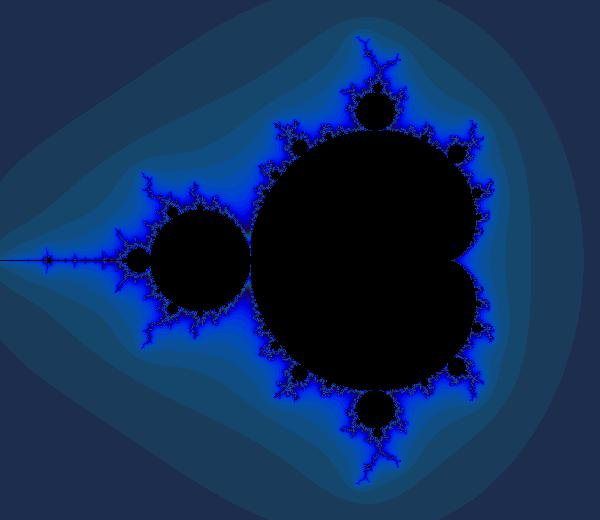

In [0]:
import tensorflow as tf
import numpy as np

import PIL.Image
from io import BytesIO
from IPython.display import Image,display


def DisplayFractal(a,fmt='jpeg'):
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)],2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

# Use NumPy to create a 2D array of complex numbers

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))



# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
for i in range(200):
    # Compute the new values of z: z^2 + x
    zs_ = zs*zs + xs

    # Have we diverged with this new value?
    not_diverged = tf.abs(zs_) < 4

    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged, tf.float32))
    
DisplayFractal(ns.numpy())

In [0]:
import tensorflow as tf 

matrix1 = tf.constant([[3.,3.]])
matrix2 = tf.constant([[2.,],[2]])
product = tf.matmul(matrix1,matrix2)
print(product)
print(float(product))

tf.Tensor([[12.]], shape=(1, 1), dtype=float32)
12.0


In [0]:
import tensorflow as tf 
x = tf.Variable([1.0,2.0])
a = tf.constant([3.0,3.0])

sub = tf.subtract(x,a)
print(sub)
print(sub.numpy())

tf.Tensor([-2. -1.], shape=(2,), dtype=float32)
[-2. -1.]


In [0]:
x.assign([4.0,6.0])

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float32, numpy=array([4., 6.], dtype=float32)>

In [0]:
sub = tf.subtract(x,a)
print(sub)
print(sub.numpy())

tf.Tensor([1. 3.], shape=(2,), dtype=float32)
[1. 3.]


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
# Pandas to Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']].values
y = df['mpg'].values # regression

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Train on 398 samples
Epoch 1/100
398/398 - 1s - loss: 1032304.2717
Epoch 2/100
398/398 - 0s - loss: 427966.1886
Epoch 3/100
398/398 - 0s - loss: 140917.9527
Epoch 4/100
398/398 - 0s - loss: 44508.3406
Epoch 5/100
398/398 - 0s - loss: 13994.5815
Epoch 6/100
398/398 - 0s - loss: 3615.3281
Epoch 7/100
398/398 - 0s - loss: 841.9367
Epoch 8/100
398/398 - 0s - loss: 405.9212
Epoch 9/100
398/398 - 0s - loss: 370.2431
Epoch 10/100
398/398 - 0s - loss: 354.0554
Epoch 11/100
398/398 - 0s - loss: 331.8447
Epoch 12/100
398/398 - 0s - loss: 318.9563
Epoch 13/100
398/398 - 0s - loss: 310.0599
Epoch 14/100
398/398 - 0s - loss: 305.0363
Epoch 15/100
398/398 - 0s - loss: 301.7529
Epoch 16/100
398/398 - 0s - loss: 299.8273
Epoch 17/100
398/398 - 0s - loss: 297.8182
Epoch 18/100
398/398 - 0s - loss: 296.3651
Epoch 19/100
398/398 - 0s - loss: 295.2013
Epoch 20/100
398/398 - 0s - loss: 293.5222
Epoch 21/100
398/398 - 0s - loss: 292.4607
Epoch 22/100
398/398 - 0s - loss: 291.1191
Epoch 23/100
398/398 - 0s -

In [0]:
pred = model.predict(x)
print("Shape: {}".format(pred.shape))
print(pred)

Shape: (398, 1)
[[24.799267 ]
 [27.23819  ]
 [25.40236  ]
 [25.355373 ]
 [25.381586 ]
 [31.523602 ]
 [31.396564 ]
 [30.969238 ]
 [31.917603 ]
 [27.861042 ]
 [26.526012 ]
 [26.156746 ]
 [28.252047 ]
 [23.483757 ]
 [17.785025 ]
 [19.377937 ]
 [19.597227 ]
 [18.614786 ]
 [16.107117 ]
 [13.439274 ]
 [16.985939 ]
 [16.98195  ]
 [17.660793 ]
 [16.044436 ]
 [18.943514 ]
 [32.685993 ]
 [30.921455 ]
 [30.706524 ]
 [30.776077 ]
 [16.094784 ]
 [16.989914 ]
 [16.719234 ]
 [15.546381 ]
 [20.170462 ]
 [20.784454 ]
 [20.899195 ]
 [19.809362 ]
 [20.517685 ]
 [28.8138   ]
 [30.706402 ]
 [27.889397 ]
 [26.866047 ]
 [30.67038  ]
 [30.224579 ]
 [30.582745 ]
 [21.896732 ]
 [16.158314 ]
 [20.865316 ]
 [19.759014 ]
 [16.336645 ]
 [15.88158  ]
 [15.146442 ]
 [15.437147 ]
 [14.572466 ]
 [13.362621 ]
 [14.638874 ]
 [15.159229 ]
 [17.241581 ]
 [15.909426 ]
 [14.452267 ]
 [17.905472 ]
 [16.728342 ]
 [28.854218 ]
 [30.828468 ]
 [26.95855  ]
 [27.906849 ]
 [26.58746  ]
 [33.314556 ]
 [28.020103 ]
 [28.48845  ]
 [32

In [0]:
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"Final score (RMSE):{score}")

Final score (RMSE):12.693657521942237


In [0]:
for  i in range(10):
  print(f"(i+1).Car name:{cars[i]},MPG:{y[i]},predicted MPG:{pred[i]}")

(i+1).Car name:chevrolet chevelle malibu,MPG:18.0,predicted MPG:[24.799267]
(i+1).Car name:buick skylark 320,MPG:15.0,predicted MPG:[27.23819]
(i+1).Car name:plymouth satellite,MPG:18.0,predicted MPG:[25.40236]
(i+1).Car name:amc rebel sst,MPG:16.0,predicted MPG:[25.355373]
(i+1).Car name:ford torino,MPG:17.0,predicted MPG:[25.381586]
(i+1).Car name:ford galaxie 500,MPG:15.0,predicted MPG:[31.523602]
(i+1).Car name:chevrolet impala,MPG:14.0,predicted MPG:[31.396564]
(i+1).Car name:plymouth fury iii,MPG:14.0,predicted MPG:[30.969238]
(i+1).Car name:pontiac catalina,MPG:14.0,predicted MPG:[31.917603]
(i+1).Car name:amc ambassador dpl,MPG:15.0,predicted MPG:[27.861042]


In [0]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.callbacks import EarlyStopping



df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/iris.csv", 
    na_values=['NA', '?'])

x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']].values
dummies = pd.get_dummies(df['species'])
species = dummies.columns
y = dummies.values

model = Sequential()
model.add(Dense(50,input_dim=x.shape[1],activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Train on 150 samples
Epoch 1/100
150/150 - 10s - loss: 1.1838
Epoch 2/100
150/150 - 0s - loss: 1.0777
Epoch 3/100
150/150 - 0s - loss: 1.0092
Epoch 4/100
150/150 - 0s - loss: 0.9621
Epoch 5/100
150/150 - 0s - loss: 0.9107
Epoch 6/100
150/150 - 0s - loss: 0.8678
Epoch 7/100
150/150 - 0s - loss: 0.8356
Epoch 8/100
150/150 - 0s - loss: 0.8012
Epoch 9/100
150/150 - 0s - loss: 0.7635
Epoch 10/100
150/150 - 0s - loss: 0.7285
Epoch 11/100
150/150 - 0s - loss: 0.6972
Epoch 12/100
150/150 - 0s - loss: 0.6603
Epoch 13/100
150/150 - 0s - loss: 0.6429
Epoch 14/100
150/150 - 0s - loss: 0.6035
Epoch 15/100
150/150 - 0s - loss: 0.5793
Epoch 16/100
150/150 - 0s - loss: 0.5633
Epoch 17/100
150/150 - 0s - loss: 0.5349
Epoch 18/100
150/150 - 0s - loss: 0.5179
Epoch 19/100
150/150 - 0s - loss: 0.4979
Epoch 20/100
150/150 - 0s - loss: 0.4786
Epoch 21/100
150/150 - 0s - loss: 0.4625
Epoch 22/100
150/150 - 0s - loss: 0.4444
Epoch 23/100
150/150 - 0s - loss: 0.4297
Epoch 24/100
150/150 - 0s - loss: 0.4118
Epo

In [0]:
print(species)

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


In [0]:
pred = model.predict(x)
print('SHape:{pred.shape}')
print(pred)

SHape:{pred.shape}
[[9.96199191e-01 3.77186062e-03 2.89745985e-05]
 [9.90964532e-01 8.94790236e-03 8.75544429e-05]
 [9.94057775e-01 5.87889832e-03 6.32735828e-05]
 [9.89808381e-01 1.00774104e-02 1.14244031e-04]
 [9.96416807e-01 3.55570111e-03 2.74464965e-05]
 [9.96280015e-01 3.69829615e-03 2.17495399e-05]
 [9.94000077e-01 5.93479443e-03 6.51547307e-05]
 [9.94814456e-01 5.14223007e-03 4.32645356e-05]
 [9.87228870e-01 1.25997588e-02 1.71358668e-04]
 [9.92142797e-01 7.78551726e-03 7.16901704e-05]
 [9.97138143e-01 2.84467940e-03 1.71986030e-05]
 [9.93282676e-01 6.65550586e-03 6.17944170e-05]
 [9.91818905e-01 8.09843000e-03 8.25889219e-05]
 [9.92841601e-01 7.06267077e-03 9.57403099e-05]
 [9.98608649e-01 1.38587342e-03 5.48215257e-06]
 [9.98649776e-01 1.34484342e-03 5.38203903e-06]
 [9.97741342e-01 2.24571978e-03 1.29911668e-05]
 [9.95873511e-01 4.09364840e-03 3.29114009e-05]
 [9.96634543e-01 3.34882364e-03 1.65976217e-05]
 [9.96734262e-01 3.24282027e-03 2.29064608e-05]
 [9.93147314e-01 6.81

In [0]:
np.set_printoptions(suppress=True)

In [0]:
print(y[0:10])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [0]:
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y,axis=1)
print(f'Predictions:{predict_classes}')
print(f'Expected:{expected_classes}')

Predictions:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Expected:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
print(species[predict_classes[1:10]])

Index(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'],
      dtype='object')


In [0]:
from sklearn.metrics import accuracy_score

correct = accuracy_score(expected_classes,predict_classes)
print(f'Accuracy:{correct}')

Accuracy:0.9733333333333334


In [0]:
sample_flower = np.array( [[5.0,3.0,4.0,2.0]], dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred)
print(f"Predict that {sample_flower} is: {species[pred]}")

[[0.00181184 0.4017276  0.5964605 ]]
Predict that [[5. 3. 4. 2.]] is: Iris-virginica


In [0]:
sample_flower = np.array( [[5.0,3.0,4.0,2.0],[5.2,3.5,1.5,0.8]], dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred,axis=1)
print(f"Predict that these two flowers {sample_flower} are: {species[pred]}")

[[1.8118391e-03 4.0172741e-01 5.9646070e-01]
 [9.8755580e-01 1.2346088e-02 9.8048549e-05]]
Predict that these two flowers [[5.  3.  4.  2. ]
 [5.2 3.5 1.5 0.8]] are: Index(['Iris-virginica', 'Iris-setosa'], dtype='object')


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

save_path = "."

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']].values
y = df['mpg'].values # regression

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

# Predict
pred = model.predict(x)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"Before save score (RMSE): {score}")

# save neural network structure to JSON (no weights)
model_json = model.to_json()
with open(os.path.join(save_path,"network.json"), "w") as json_file:
    json_file.write(model_json)

# save neural network structure to YAML (no weights)
model_yaml = model.to_yaml()
with open(os.path.join(save_path,"network.yaml"), "w") as yaml_file:
    yaml_file.write(model_yaml)

# save entire network to HDF5 (save everything, suggested)
model.save(os.path.join(save_path,"network.h5"))

Train on 398 samples
Epoch 1/100
398/398 - 0s - loss: 83815.4904
Epoch 2/100
398/398 - 0s - loss: 27557.1490
Epoch 3/100
398/398 - 0s - loss: 5705.1641
Epoch 4/100
398/398 - 0s - loss: 469.5508
Epoch 5/100
398/398 - 0s - loss: 266.1865
Epoch 6/100
398/398 - 0s - loss: 267.4399
Epoch 7/100
398/398 - 0s - loss: 161.4207
Epoch 8/100
398/398 - 0s - loss: 138.2531
Epoch 9/100
398/398 - 0s - loss: 138.1746
Epoch 10/100
398/398 - 0s - loss: 134.8353
Epoch 11/100
398/398 - 0s - loss: 132.4092
Epoch 12/100
398/398 - 0s - loss: 130.3554
Epoch 13/100
398/398 - 0s - loss: 128.8130
Epoch 14/100
398/398 - 0s - loss: 126.4025
Epoch 15/100
398/398 - 0s - loss: 124.6615
Epoch 16/100
398/398 - 0s - loss: 122.8577
Epoch 17/100
398/398 - 0s - loss: 120.9067
Epoch 18/100
398/398 - 0s - loss: 119.2065
Epoch 19/100
398/398 - 0s - loss: 117.6875
Epoch 20/100
398/398 - 0s - loss: 116.4180
Epoch 21/100
398/398 - 0s - loss: 114.6345
Epoch 22/100
398/398 - 0s - loss: 113.1949
Epoch 23/100
398/398 - 0s - loss: 111

In [0]:

from tensorflow.keras.models import load_model
model2 = load_model(os.path.join(save_path,"network.h5"))
pred = model2.predict(x)
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"After load score (RMSE): {score}")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
After load score (RMSE): 8.72316093809169


In [0]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/iris.csv", 
    na_values=['NA', '?'])

# Convert to numpy - Classification
x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']].values
dummies = pd.get_dummies(df['species']) # Classification
species = dummies.columns
y = dummies.values

# Split into validation and training sets
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

# Build neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(y.shape[1],activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 112 samples, validate on 38 samples
Epoch 1/1000
112/112 - 0s - loss: 1.2083 - val_loss: 1.1219
Epoch 2/1000
112/112 - 0s - loss: 1.1057 - val_loss: 1.0748
Epoch 3/1000
112/112 - 0s - loss: 1.0543 - val_loss: 1.0514
Epoch 4/1000
112/112 - 0s - loss: 1.0285 - val_loss: 1.0348
Epoch 5/1000
112/112 - 0s - loss: 1.0046 - val_loss: 1.0103
Epoch 6/1000
112/112 - 0s - loss: 0.9818 - val_loss: 0.9837
Epoch 7/1000
112/112 - 0s - loss: 0.9573 - val_loss: 0.9564
Epoch 8/1000
112/112 - 0s - loss: 0.9320 - val_loss: 0.9261
Epoch 9/1000
112/112 - 0s - loss: 0.9093 - val_loss: 0.8934
Epoch 10/1000
112/112 - 0s - loss: 0.8814 - val_loss: 0.8608
Epoch 11/1000
112/112 - 0s - loss: 0.8559 - val_loss: 0.8283
Epoch 12/1000
112/112 - 0s - loss: 0.8282 - val_loss: 0.7969
Epoch 13/1000
112/112 - 0s - loss: 0.7996 - val_loss: 0.7664
Epoch 14/1000
112/112 - 0s - loss: 0.7710 - val_loss: 0.7376
Epoch 15/1000
112/112 - 0s - loss: 0.7460 - val_loss: 0.7077
Epoch 16/1000
112/112 - 0s - loss: 0.7187 - val_l

In [0]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_test)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
correct = accuracy_score(expected_classes,predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.9736842105263158


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']].values
y = df['mpg'].values # regression

# Split into validation and training sets
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 298 samples, validate on 100 samples
Epoch 1/1000
298/298 - 0s - loss: 529.2814 - val_loss: 412.5505
Epoch 2/1000
298/298 - 0s - loss: 372.0026 - val_loss: 314.0142
Epoch 3/1000
298/298 - 0s - loss: 311.4359 - val_loss: 298.1749
Epoch 4/1000
298/298 - 0s - loss: 291.1056 - val_loss: 273.5881
Epoch 5/1000
298/298 - 0s - loss: 270.9883 - val_loss: 269.5673
Epoch 6/1000
298/298 - 0s - loss: 258.2449 - val_loss: 240.7946
Epoch 7/1000
298/298 - 0s - loss: 245.0444 - val_loss: 228.6629
Epoch 8/1000
298/298 - 0s - loss: 238.9602 - val_loss: 224.8271
Epoch 9/1000
298/298 - 0s - loss: 223.1768 - val_loss: 212.1622
Epoch 10/1000
298/298 - 0s - loss: 205.4465 - val_loss: 189.4716
Epoch 11/1000
298/298 - 0s - loss: 199.8956 - val_loss: 179.6740
Epoch 12/1000
298/298 - 0s - loss: 183.4884 - val_loss: 172.0608
Epoch 13/1000
298/298 - 0s - loss: 176.1962 - val_loss: 158.0738
Epoch 14/1000
298/298 - 0s - loss: 166.6122 - val_loss: 148.5078
Epoch 15/1000
298/298 - 0s - loss: 156.0549 - val_los

In [0]:
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 7.9645361981887435


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

# Create a dataset for the XOR function
x = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])

y = np.array([
    0,
    1,
    1,
    0
])

# Build the network
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

done = False
cycle = 1

while not done:
    print("Cycle #{}".format(cycle))
    cycle+=1
    model = Sequential()
    model.add(Dense(2, input_dim=2, activation='relu')) 
    model.add(Dense(1)) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x,y,verbose=0,epochs=10000)

    # Predict
    pred = model.predict(x)
    
    # Check if successful.  It takes several runs with this small of a network
    done = pred[0]<0.01 and pred[3]<0.01 and pred[1] > 0.9 and pred[2] > 0.9 
    print(pred)

Cycle #1
[[6.6740384e-08]
 [9.9999994e-01]
 [9.9999988e-01]
 [1.0650834e-07]]


In [0]:
input0 = 0
input1 = 1

hidden0Sum = (input0*1.3)+(input1*1.3)+(-1.3)
hidden1Sum = (input0*1.2)+(input1*1.2)+(0)

print(hidden0Sum) # 0
print(hidden1Sum) # 1.2

hidden0 = max(0,hidden0Sum)
hidden1 = max(0,hidden1Sum)

print(hidden0) # 0
print(hidden1) # 1.2

outputSum = (hidden0*-1.6)+(hidden1*0.8)+(0)
print(outputSum) # 0.96

output = max(0,outputSum)

print(output) # 0.96

0.0
1.2
0
1.2
0.96
0.96


## Encoding Features

In [0]:
import pandas as pd

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

display(df[0:5])

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
1,2,kd,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c
2,3,pe,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b
3,4,11,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b
4,5,kl,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a


In [0]:
dummies = pd.get_dummies(df['job'],prefix="job")
print(dummies.shape)
display(dummies[0:10])

(2000, 33)


,job_11,job_al,job_am,job_ax,job_bf,job_by,job_cv,job_de,job_dz,job_e2,job_f8,job_gj,job_gv,job_kd,job_ke,job_kl,job_kp,job_ks,job_kw,job_mm,job_nb,job_nn,job_ob,job_pe,job_po,job_pq,job_pz,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
df = pd.concat([df,dummies],axis=1)
df.drop('job', axis=1, inplace=True)
display(df[0:10])

,id,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product,job_11,job_al,job_am,job_ax,job_bf,job_by,job_cv,job_de,job_dz,job_e2,job_f8,job_gj,job_gv,job_kd,job_ke,job_kl,job_kp,job_ks,job_kw,job_mm,job_nb,job_nn,job_ob,job_pe,job_po,job_pq,job_pz,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz
0,1,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,4,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,c,70854.0,40.400000,1,14.893343,87,20.340593,43,0.866142,0.673228,0.473581,d,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,d,38726.0,30.975000,3,3.822477,33,9.480399,39,0.976378,0.874016,0.092151,f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,a,55162.0,26.966667,2,4.312097,17,29.219896,44,1.000000,0.724409,0.162833,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,9,c,67311.0,32.383333,0,25.093772,169,10.927357,45,0.952756,0.681102,0.096333,c,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,a,63344.0,38.233333,1,2.816034,3,21.915695,42,0.897638,0.724409,0.173986,c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
med = df['income'].median()
df['income'] = df['income'].fillna(med)

In [0]:
print(list(df.columns))

['id', 'area', 'income', 'aspect', 'subscriptions', 'dist_healthy', 'save_rate', 'dist_unhealthy', 'age', 'pop_dense', 'retail_dense', 'crime', 'product', 'job_11', 'job_al', 'job_am', 'job_ax', 'job_bf', 'job_by', 'job_cv', 'job_de', 'job_dz', 'job_e2', 'job_f8', 'job_gj', 'job_gv', 'job_kd', 'job_ke', 'job_kl', 'job_kp', 'job_ks', 'job_kw', 'job_mm', 'job_nb', 'job_nn', 'job_ob', 'job_pe', 'job_po', 'job_pq', 'job_pz', 'job_qp', 'job_qw', 'job_rn', 'job_sa', 'job_vv', 'job_zz']


In [0]:
x_columns = df.columns.drop('product').drop('id')
print(list(x_columns))

['area', 'income', 'aspect', 'subscriptions', 'dist_healthy', 'save_rate', 'dist_unhealthy', 'age', 'pop_dense', 'retail_dense', 'crime', 'job_11', 'job_al', 'job_am', 'job_ax', 'job_bf', 'job_by', 'job_cv', 'job_de', 'job_dz', 'job_e2', 'job_f8', 'job_gj', 'job_gv', 'job_kd', 'job_ke', 'job_kl', 'job_kp', 'job_ks', 'job_kw', 'job_mm', 'job_nb', 'job_nn', 'job_ob', 'job_pe', 'job_po', 'job_pq', 'job_pz', 'job_qp', 'job_qw', 'job_rn', 'job_sa', 'job_vv', 'job_zz']


In [0]:

# Convert to numpy - Classification
x_columns = df.columns.drop('product').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['product']) # Classification
products = dummies.columns
y = dummies.values

In [0]:
print(x)
print(y)

[['c' 50876.0 13.1 ... 0 1 0]
 ['c' 60369.0 18.625 ... 0 0 0]
 ['c' 55126.0 34.766666666666666 ... 0 0 0]
 ...
 ['d' 28595.0 39.425 ... 0 0 0]
 ['c' 67949.0 5.7333333333333325 ... 0 0 0]
 ['c' 61467.0 16.891666666666666 ... 0 0 0]]
[[0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [0]:

y = df['income'].values
print(y)

[50876. 60369. 55126. ... 28595. 67949. 61467.]


## multi_class 

In [0]:
import pandas as pd

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv",
    na_values=['NA','?'])

display(df[0:5])

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
import pandas as pd
from scipy.stats import zscore

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('product').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['product']) # Classification
products = dummies.columns
y = dummies.values

In [0]:
# Classification neural network
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu',kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(y.shape[1],activation='softmax',kernel_initializer='random_normal'))
model.compile(loss='categorical_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 1500 samples, validate on 500 samples
Epoch 1/1000
1500/1500 - 1s - loss: 1.4989 - acc: 0.4567 - val_loss: 1.1505 - val_acc: 0.3740
Epoch 2/1000
1500/1500 - 0s - loss: 1.1461 - acc: 0.4673 - val_loss: 1.0959 - val_acc: 0.4980
Epoch 3/1000
1500/1500 - 0s - loss: 1.0838 - acc: 0.4913 - val_loss: 1.0234 - val_acc: 0.5160
Epoch 4/1000
1500/1500 - 0s - loss: 0.9501 - acc: 0.5880 - val_loss: 0.9438 - val_acc: 0.5840
Epoch 5/1000
1500/1500 - 0s - loss: 0.8369 - acc: 0.6707 - val_loss: 0.8237 - val_acc: 0.6860
Epoch 6/1000
1500/1500 - 0s - loss: 0.7945 - acc: 0.6840 - val_loss: 0.8108 - val_acc: 0.7000
Epoch 7/1000
1500/1500 - 0s - loss: 0.7615 - acc: 0.6913 - val_loss: 0.7978 - val_acc: 0.6980
Epoch 8/1000
1500/1500 - 0s - loss: 0.7452 - acc: 0.6927 - val_loss: 0.7897 - val_acc: 0.6700
Ep

In [0]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

In [0]:
from sklearn import metrics

y_compare = np.argmax(y_test,axis=1) 
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.708


## regression

In [0]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Generate dummies for product
df = pd.concat([df,pd.get_dummies(df['product'],prefix="product")],axis=1)
df.drop('product', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('age').drop('id')
x = df[x_columns].values
y = df['age'].values

# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 1500 samples, validate on 500 samples
Epoch 1/1000
1500/1500 - 0s - loss: 1704.6380 - val_loss: 1369.8172
Epoch 2/1000
1500/1500 - 0s - loss: 975.1354 - val_loss: 527.7275
Epoch 3/1000
1500/1500 - 0s - loss: 326.5919 - val_loss: 245.5524
Epoch 4/1000
1500/1500 - 0s - loss: 234.9015 - val_loss: 213.4800
Epoch 5/1000
1500/1500 - 0s - loss: 198.5183 - val_loss: 176.8056
Epoch 6/1000
1500/1500 - 0s - loss: 160.4528 - val_loss: 141.5068
Epoch 7/1000
1500/1500 - 0s - loss: 124.9974 - val_loss: 110.2784
Epoch 8/1000
1500/1500 - 0s - loss: 96.8863 - val_loss: 86.5501
Epoch 9/1000
1500/1500 - 0s - loss: 75.2121 - val_loss: 69.7207
Epoch 10/1000
1500/1500 - 0s - loss: 60.3381 - val_loss: 57.8809
Epoch 11/1000
1500/1500 - 0s - loss: 49.2679 - val_loss: 49.0643
Epoch 12/1000
1500/1500 - 0s - loss: 41.4617 - val_loss: 42.4087
Epoch 13/1000
1500/1500 - 0s - loss: 35.1696 - val_loss: 37.1201
Epoch 14/1000
1500/1500 - 0s - loss: 30.2340 - val_loss: 32.5778
Epoch 15/1000
1500/1500 - 0s - loss:

In [0]:

# Predict
pred = model.predict(x_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.6017046723726452


In [0]:

import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.7756962500699905


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Restoring model weights from the end of the best epoch.
Epoch 00140: early stopping


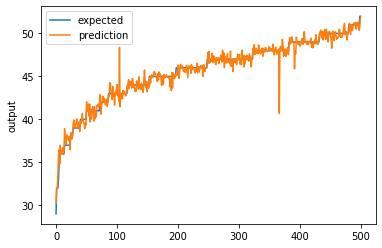

In [1]:
                                                                                                                                                                                                                                                                                     
         %matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt


# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Generate dummies for product
df = pd.concat([df,pd.get_dummies(df['product'],prefix="product")],axis=1)
df.drop('product', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('age').drop('id')
x = df[x_columns].values
y = df['age'].values

# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam') # Modify here
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)

# Plot the chart
pred = model.predict(x_test)
chart_regression(pred.flatten(),y_test)                                                                                                                                                                                                                                                                            

In [2]:
from sklearn import metrics
import numpy as np

predicted = [1.1,1.9,3.4,4.2,4.3]
expected = [1,2,3,4,5]

score_mse = metrics.mean_squared_error(predicted,expected)
score_rmse = np.sqrt(score_mse)
print("Score (MSE): {}".format(score_mse))
print("Score (RMSE): {}".format(score_rmse))

Score (MSE): 0.14200000000000007
Score (RMSE): 0.37682887362833556


In [3]:
score_mse = ((predicted[0]-expected[0])**2 + (predicted[1]-expected[1])**2 
+ (predicted[2]-expected[2])**2 + (predicted[3]-expected[3])**2
+ (predicted[4]-expected[4])**2)/len(predicted)
score_rmse = np.sqrt(score_mse)
    
print("Score (MSE): {}".format(score_mse))
print("Score (RMSE): {}".format(score_rmse))

Score (MSE): 0.14200000000000007
Score (RMSE): 0.37682887362833556


In [4]:
from sklearn import metrics

expected = [1,1,0,0,0]
predicted = [0.9,0.99,0.1,0.05,0.06]

print(metrics.log_loss(expected,predicted))

0.06678801305495843


In [5]:
import numpy as np

score_logloss = (np.log(1.0-np.abs(expected[0]-predicted[0]))+\
np.log(1.0-np.abs(expected[1]-predicted[1]))+\
np.log(1.0-np.abs(expected[2]-predicted[2]))+\
np.log(1.0-np.abs(expected[3]-predicted[3]))+\
np.log(1.0-np.abs(expected[4]-predicted[4])))\
*(-1/len(predicted))

print(f'Score Logloss {score_logloss}')

Score Logloss 0.06678801305495843


Score (MSE): 0.14200000000000007
Score (RMSE): 0.37682887362833556


In [7]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

TensorFlow is already loaded. Please restart the runtime to change versions.
Note: using Google CoLab


In [0]:
from sklearn.linear_model import LassoCV
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
names = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']
x = df[names].values
y = df['mpg'].values # regression

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=45)

In [0]:
# Simple function to evaluate the coefficients of a regression
%matplotlib inline    
from IPython.display import display, HTML    

def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = names )
    r = r.sort_values(by=['coef'])
    display(r)
    print(f"Intercept: {intercept}")
    r['coef'].plot(kind='barh', color=r['positive'].map({True: 'b', False: 'r'}))

Final score (RMSE): 3.0019345985860784


,coef,positive
cylinders,-0.427721,False
weight,-0.007255,False
horsepower,-0.005491,False
displacement,0.020166,True
acceleration,0.138575,True
year,0.783047,True
origin,1.003762,True


Intercept: -19.101231042200084


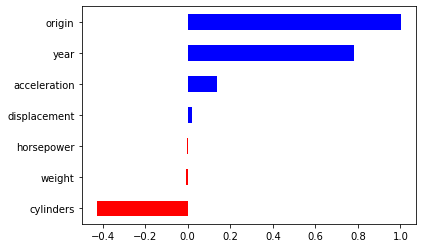

In [10]:
import sklearn

# Create linear regression
regressor = sklearn.linear_model.LinearRegression()

# Fit/train linear regression
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

Final score (RMSE): 3.0604021904033303


,coef,positive
cylinders,-0.012995,False
weight,-0.007328,False
horsepower,-0.002715,False
displacement,0.011601,True
acceleration,0.114391,True
origin,0.708222,True
year,0.777480,True


Intercept: -18.506677982383223


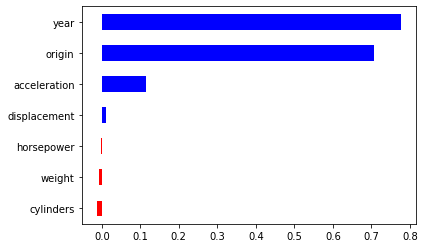

In [11]:
import sklearn
from sklearn.linear_model import Lasso

# Create linear regression
regressor = Lasso(random_state=0,alpha=0.1)

# Fit/train LASSO
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)